In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import ttest_ind, f_oneway
from scipy.stats import mannwhitneyu


## Data Cleaning

In [5]:

states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 
          'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 
          'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 
          'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 
          'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 
          'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 
          'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 
          'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico']

In [6]:
data_2018 = pd.read_csv('new-state-data/2018-remote-state-data.csv')

filtered_data_2018 = data_2018[data_2018['Unnamed: 0'] == 'Worked at home:']

worked_at_home_2018 = filtered_data_2018.iloc[0, 1::2].values

final_data_2018 = pd.DataFrame({
    'State': states,
    'Worked from home': worked_at_home_2018
})

final_data_2018['Worked from home'] = final_data_2018['Worked from home'].str.replace(',', '').astype(int)

final_data_2018 = final_data_2018[final_data_2018['State'] != 'Puerto Rico']

final_data_2018.head()

,State,Worked from home
0,Alabama,68856
1,Alaska,17696
2,Arizona,212657
3,Arkansas,47991
4,California,1099288


In [7]:
data_2019 = pd.read_csv('new-state-data/2019-remote-state-data.csv')

filtered_data_2019 = data_2019[data_2019['Unnamed: 0'] == 'Worked from home:']

worked_at_home_2019 = filtered_data_2019.iloc[0, 1::2].values

final_data_2019 = pd.DataFrame({
    'State': states,
    'Worked from home': worked_at_home_2019
})

final_data_2019['Worked from home'] = final_data_2019['Worked from home'].str.replace(',', '').astype(int)

final_data_2019 = final_data_2019[final_data_2019['State'] != 'Puerto Rico']

final_data_2019.head()

,State,Worked from home
0,Alabama,71617
1,Alaska,14782
2,Arizona,246651
3,Arkansas,45324
4,California,1179695


In [8]:
data_2020 = pd.read_csv('new-state-data/2020-remote-state-data.csv')

filtered_data_2020 = data_2020[data_2020['Unnamed: 0'] == 'Worked from home:']

state_values_2020 = filtered_data_2020.iloc[0, ::2].values

worked_at_home_2020 = filtered_data_2020.iloc[0, 1::2].values

final_data_2020 = pd.DataFrame({
    'State': states,
    'Worked from home': list(worked_at_home_2020) + [None]
})

final_data_2020 = final_data_2020[final_data_2020['State'] != 'Puerto Rico']

final_data_2020['Worked from home'] = final_data_2020['Worked from home'].str.replace(',', '').astype(int)

final_data_2020.head()

,State,Worked from home
0,Alabama,178577
1,Alaska,39186
2,Arizona,581707
3,Arkansas,100165
4,California,3332699


In [9]:
data_2021 = pd.read_csv('new-state-data/2021-remote-state-data.csv')

filtered_data_2021 = data_2021[data_2021['Unnamed: 0'] == 'Worked from home:']

worked_at_home_2021 = filtered_data_2021.iloc[0, 1::2].values

final_data_2021 = pd.DataFrame({
    'State': states,
    'Worked from home': worked_at_home_2021
})

final_data_2021['Worked from home'] = final_data_2021['Worked from home'].str.replace(',', '').astype(int)

final_data_2021 = final_data_2021[final_data_2021['State'] != 'Puerto Rico']

final_data_2021.head()

,State,Worked from home
0,Alabama,206820
1,Alaska,35235
2,Arizona,675552
3,Arkansas,126793
4,California,3789909


In [10]:
data_2022 = pd.read_csv('new-state-data/2022-remote-state-data.csv')

filtered_data_2022 = data_2022[data_2022['Unnamed: 0'] == 'Worked from home:']

worked_at_home_2022 = filtered_data_2022.iloc[0, 1::2].values

# Create a DataFrame with states and worked_at_home_values for 2019
final_data_2022 = pd.DataFrame({
    'State': states,
    'Worked from home': worked_at_home_2022
})

# Convert the "Worked at home" column to integers
final_data_2022['Worked from home'] = final_data_2022['Worked from home'].str.replace(',', '').astype(int)

final_data_2022 = final_data_2022[final_data_2022['State'] != 'Puerto Rico']

# Display the final cleaned data for 2019
final_data_2022.head()

,State,Worked from home
0,Alabama,199321
1,Alaska,33843
2,Arizona,647427
3,Arkansas,115063
4,California,3182255


In [11]:
combined_wfh_data = pd.concat([
    final_data_2018.assign(Year=2018),
    final_data_2019.assign(Year=2019),
    final_data_2020.assign(Year=2020),
    final_data_2021.assign(Year=2021), 
    final_data_2022.assign(Year=2022)
])

combined_wfh_data = combined_wfh_data[['State', 'Year', 'Worked from home']]

combined_wfh_data = combined_wfh_data.sort_values(by=["State", "Year"])

combined_wfh_data.reset_index(drop=True, inplace=True)

combined_wfh_data

,State,Year,Worked from home
0,Alabama,2018,68856
1,Alabama,2019,71617
2,Alabama,2020,178577
3,Alabama,2021,206820
4,Alabama,2022,199321
...,...,...,...
250,Wyoming,2018,17513
251,Wyoming,2019,15941
252,Wyoming,2020,24515
253,Wyoming,2021,25177


In [12]:
pd.read_excel('table1.xlsx')

data = pd.read_excel('table1.xlsx', skiprows=3)

# Rename the columns properly
data.columns = data.iloc[0]
data = data.drop(0)

# Extract the relevant columns for the years 2018 to 2021
columns_needed = ['State', 2018, 2019, 2020, 2021]

filtered_data = data[columns_needed]

# Reset the index for better readability
filtered_data.reset_index(drop=True, inplace=True)

filtered_data = filtered_data.melt(id_vars=["State"], var_name="Year", value_name="Emissions")

rows_to_drop = filtered_data[filtered_data['State'].str.contains('Sources:', na=False)].index

filtered_data = filtered_data.drop(rows_to_drop)

filtered_data.reset_index(drop=True, inplace=True)

rows_to_drop_total = filtered_data[filtered_data['State'].str.contains('Total of states', na=False)].index

filtered_data = filtered_data.drop(rows_to_drop_total)

# Reset index after dropping the rows
filtered_data.reset_index(drop=True, inplace=True)

filtered_data = filtered_data.sort_values(by=["State", "Year"])

filtered_data.reset_index(drop=True, inplace=True)

co2_data_clean = filtered_data.dropna()

# Reset index for better readability
co2_data_clean.reset_index(drop=True, inplace=True)

co2_data_clean['Year'] = co2_data_clean['Year'].astype(int)

co2_data_clean

/var/folders/nt/trr1v_vd75qb1zyf0b0xzkzc0000gn/T/ipykernel_11196/3585301417.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co2_data_clean['Year'] = co2_data_clean['Year'].astype(int)


,State,Year,Emissions
0,Alabama,2018,112.355761
1,Alabama,2019,106.254617
2,Alabama,2020,98.431803
3,Alabama,2021,108.392103
4,Alaska,2018,34.515445
...,...,...,...
199,Wisconsin,2021,92.461744
200,Wyoming,2018,63.846521
201,Wyoming,2019,59.097402
202,Wyoming,2020,55.626761


In [13]:
merged_data = pd.merge(co2_data_clean, combined_wfh_data, on=['State', 'Year'])
merged_data

,State,Year,Emissions,Worked from home
0,Alabama,2018,112.355761,68856
1,Alabama,2019,106.254617,71617
2,Alabama,2020,98.431803,178577
3,Alabama,2021,108.392103,206820
4,Alaska,2018,34.515445,17696
...,...,...,...,...
199,Wisconsin,2021,92.461744,434916
200,Wyoming,2018,63.846521,17513
201,Wyoming,2019,59.097402,15941
202,Wyoming,2020,55.626761,24515


## Exploratory Data Analysis (EDA)

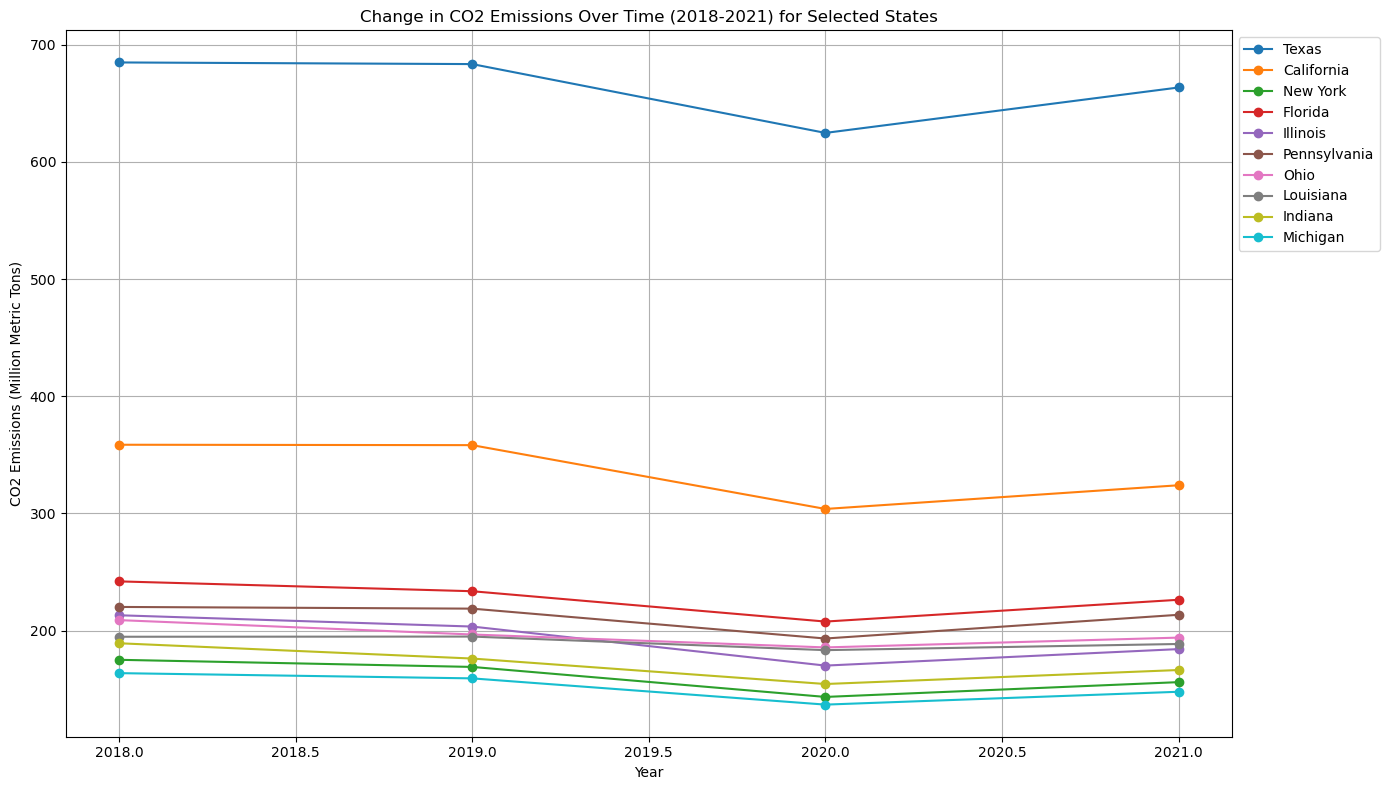

In [14]:
# Plotting the change in emissions over time for each state with improved readability
plt.figure(figsize=(14, 8))

# Plot for a selected few states for better readability
selected_states = ['Texas', 'California', 'New York', 'Florida', 'Illinois', 'Pennsylvania', 'Ohio', 'Louisiana', 'Indiana', 'Michigan']

for state in selected_states:
    state_data = co2_data_clean[co2_data_clean['State'] == state]
    plt.plot(state_data['Year'], state_data['Emissions'], marker='o', label=state)

plt.title('Change in CO2 Emissions Over Time (2018-2021) for Selected States')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (Million Metric Tons)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

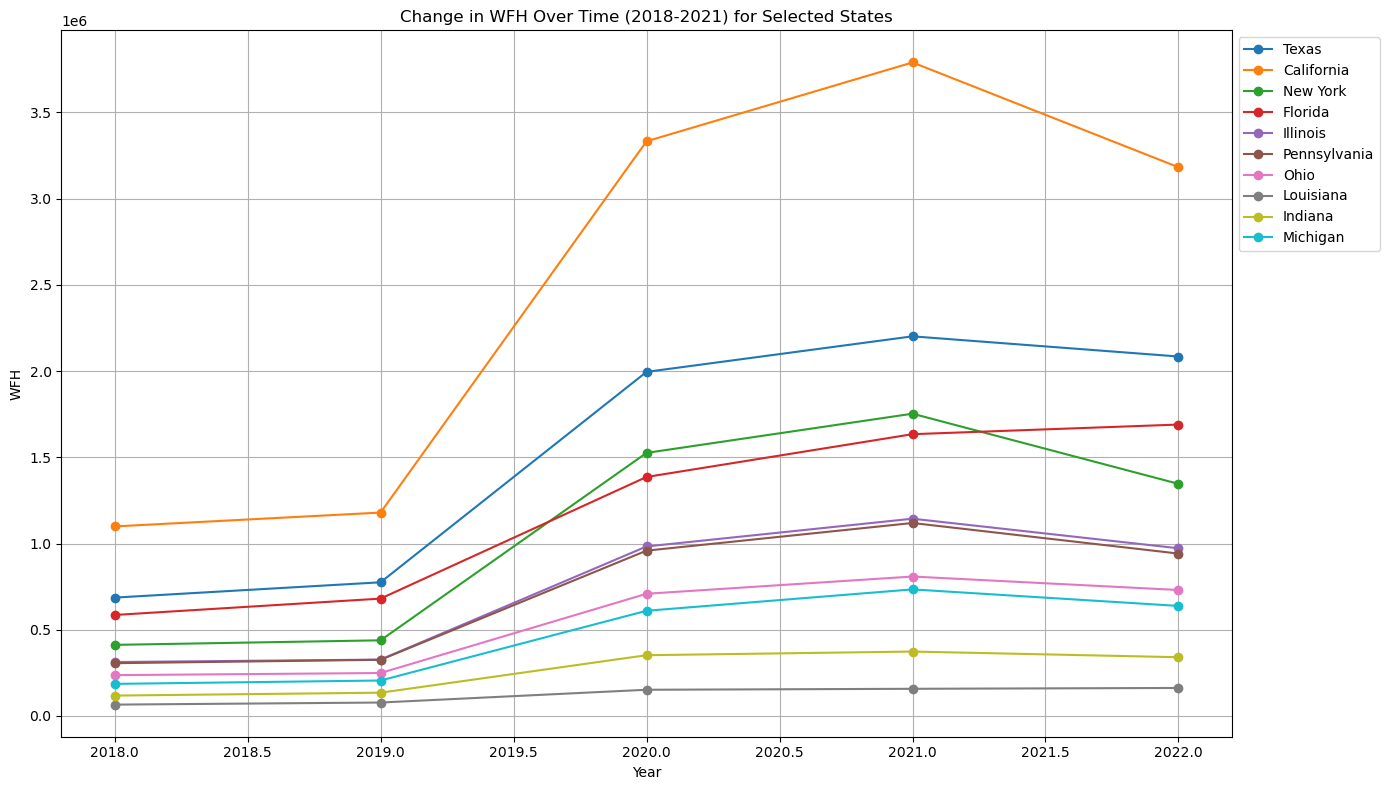

In [15]:
plt.figure(figsize=(14, 8))

# Plot for a selected few states for better readability
selected_states = ['Texas', 'California', 'New York', 'Florida', 'Illinois', 'Pennsylvania', 'Ohio', 'Louisiana', 'Indiana', 'Michigan']

for state in selected_states:
    state_data = combined_wfh_data[combined_wfh_data['State'] == state]
    plt.plot(state_data['Year'], state_data['Worked from home'], marker='o', label=state)

plt.title('Change in WFH Over Time (2018-2021) for Selected States')
plt.xlabel('Year')
plt.ylabel('WFH')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

they are inverses of each other

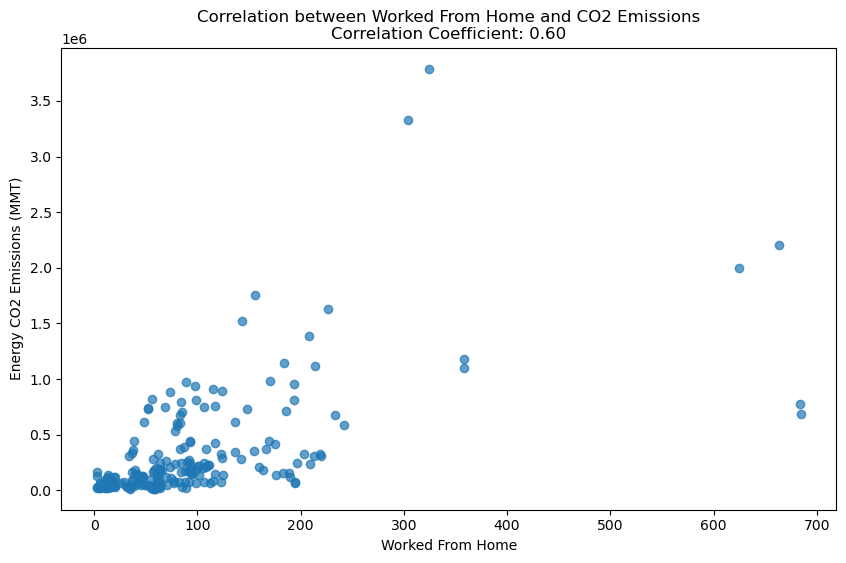

0.5996902897234389

In [16]:
merged_data = pd.merge(co2_data_clean, combined_wfh_data, on=['State', 'Year'])

correlation = merged_data['Emissions'].corr(merged_data['Worked from home'])

plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Emissions'], merged_data['Worked from home'], alpha=0.7)
plt.title(f'Correlation between Worked From Home and CO2 Emissions\nCorrelation Coefficient: {correlation:.2f}')
plt.xlabel('Worked From Home')
plt.ylabel('Energy CO2 Emissions (MMT)')
plt.show()

correlation

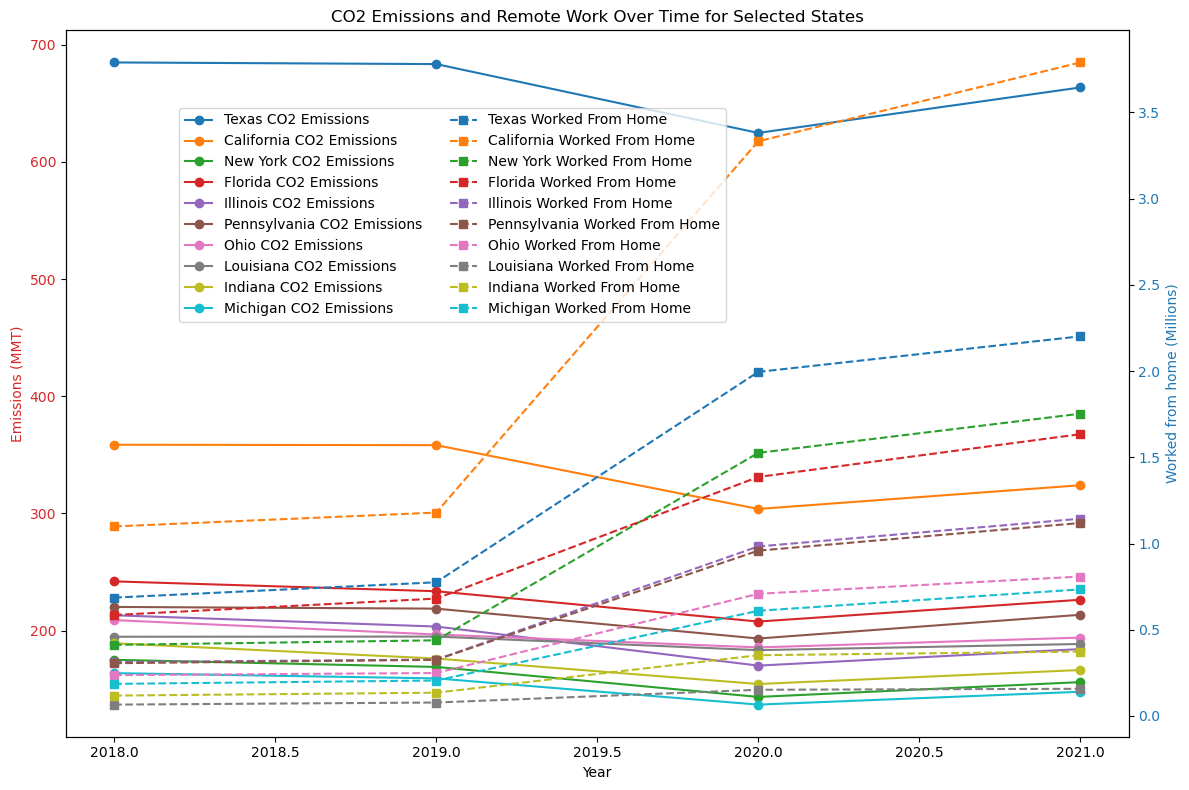

In [17]:
selected_states = ['Texas', 'California', 'New York', 'Florida', 'Illinois', 'Pennsylvania', 'Ohio', 'Louisiana', 'Indiana', 'Michigan']

fig, ax1 = plt.subplots(figsize=(12, 8))

# Generate a color map
colors = plt.cm.tab10(np.linspace(0, 1, len(selected_states)))

# Plotting CO2 emissions on the left y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('Emissions (MMT)', color='tab:red')
for i, state in enumerate(selected_states):
    state_data = merged_data[merged_data['State'] == state]
    ax1.plot(state_data['Year'], state_data['Emissions'], color=colors[i], marker='o', linestyle='-', label=f'{state} CO2 Emissions')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Creating a second y-axis for the number of people working from home
ax2 = ax1.twinx()
ax2.set_ylabel('Worked from home (Millions)', color='tab:blue')
for i, state in enumerate(selected_states):
    state_data = merged_data[merged_data['State'] == state]
    ax2.plot(state_data['Year'], state_data['Worked from home'] / 1e6, color=colors[i], marker='s', linestyle='--', label=f'{state} Worked From Home')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Adding a title
plt.title('CO2 Emissions and Remote Work Over Time for Selected States')

# Adding a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left', bbox_to_anchor=(0.1, 0.9), ncol=2)

fig.tight_layout()
plt.show()


### Assumption 
1.  **Independence**:
$$\epsilon_1, \epsilon_2, \dots, \epsilon_n \quad \text{are independent}$$

2.  **Identical / homoscedasticity** 

$$\text{The errors have constant variance, i.e.,} \quad \text{Var}(\epsilon_i) = \sigma^2 \quad \text{for all }i.
$$


3.  **Normally distributed** 
 $$\epsilon_i \sim N(0, \sigma^2)$$


4.  **Linearity** 
 The relationship between the independent variables and the response is linear


5.  **Completeness** 
 All the variables which influence the response $y$ are included in the covariates. (This assumption can be handled by considering regression models with random slope and/or random intercept)
"

## Analysis

In [18]:
#Linear regression model
X = merged_data['Worked from home']
Y = merged_data['Emissions']

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Emissions   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     113.4
Date:                Sat, 08 Jun 2024   Prob (F-statistic):           2.61e-21
Time:                        19:48:08   Log-Likelihood:                -1192.2
No. Observations:                 204   AIC:                             2388.
Df Residuals:                     202   BIC:                             2395.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               55.5580      7.094      7.832      0.000      41.571      69.545
Worked from home     0.0001   1.19e-05     10.651      0.000       0.000       0.000
==============================================================================
Omnibus:                      171.206   Durbin-Watson:                   0.804
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2685.945
Skew:                           3.153   Prob(JB):                         0.00
Kurtosis:                      19.620   Cond. No.                     7.19e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
Y_log = np.log(merged_data['Emissions'])

# Fit the model again
X = sm.add_constant(merged_data['Worked from home'])
model_log = sm.OLS(Y_log, X).fit()
print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:              Emissions   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     67.82
Date:                Sat, 08 Jun 2024   Prob (F-statistic):           2.21e-14
Time:                        19:48:08   Log-Likelihood:                -265.79
No. Observations:                 204   AIC:                             535.6
Df Residuals:                     202   BIC:                             542.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.7915      0.076  

In [20]:
residuals = model_log.resid
standardized_residuals = residuals / np.std(residuals)
outliers = np.abs(standardized_residuals) > 2.5

filtered_data = merged_data[~outliers]

X_filtered = sm.add_constant(filtered_data['Worked from home'])
Y_filtered_log = np.log(filtered_data['Emissions'])
model_filtered_log = sm.OLS(Y_filtered_log, X_filtered).fit()
print(model_filtered_log.summary())


                            OLS Regression Results                            
Dep. Variable:              Emissions   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     75.11
Date:                Sat, 08 Jun 2024   Prob (F-statistic):           1.59e-15
Time:                        19:48:08   Log-Likelihood:                -238.30
No. Observations:                 200   AIC:                             480.6
Df Residuals:                     198   BIC:                             487.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.8695      0.068  

- Test for independence
    - The relationship between the independent and dependent variables should be linear. This can be checked by plotting the residuals against the independent variable $x$. 
    If the residuals are randomly scattered around 0, then the assumption of linearity is likely satisfied.

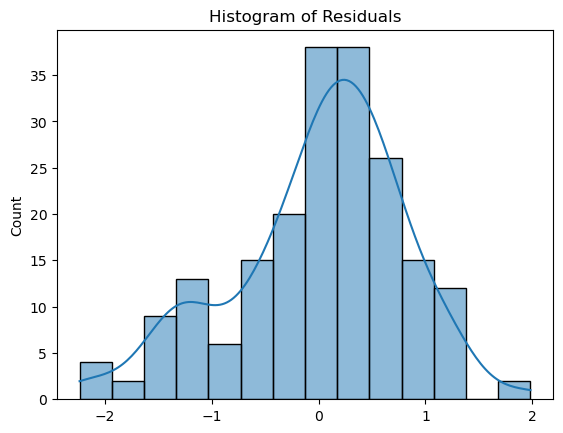

In [22]:
sns.histplot(model_filtered_log.resid, kde=True)
plt.title('Histogram of Residuals')
plt.show()

- Test for Normality 
    - Use a QQ-plot to compare the residuals to a normal distribution.

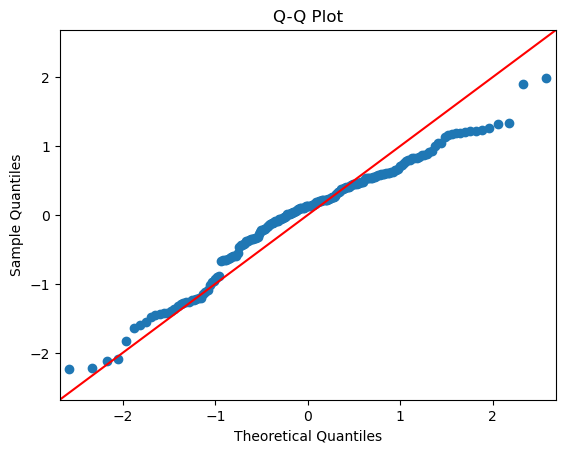

In [23]:
sm.qqplot(model_filtered_log.resid, line='45')
plt.title('Q-Q Plot')
plt.show()


#### Heteroscedasticity

The **identical** assumption on the $\epsilon_i$ requires that the errors have constant variance. This can be checked by plotting the residuals against the predicted values of $y$, or by plotting the residuals against the independent variable $x$.

In [1]:
predicted_values = model_filtered_log.predict(X_filtered)
residuals = model_filtered_log.resid

# Plotting the residuals
plt.scatter(predicted_values, residuals)
plt.axhline(y=0, linestyle='--', color='red')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

NameError: name 'model_filtered_log' is not defined

In [24]:
merged_data

,State,Year,Emissions,Worked from home
0,Alabama,2018,112.355761,68856
1,Alabama,2019,106.254617,71617
2,Alabama,2020,98.431803,178577
3,Alabama,2021,108.392103,206820
4,Alaska,2018,34.515445,17696
...,...,...,...,...
199,Wisconsin,2021,92.461744,434916
200,Wyoming,2018,63.846521,17513
201,Wyoming,2019,59.097402,15941
202,Wyoming,2020,55.626761,24515


In [25]:
Y

0      112.355761
1      106.254617
2       98.431803
3      108.392103
4       34.515445
          ...    
199     92.461744
200     63.846521
201     59.097402
202     55.626761
203     54.596720
Name: Emissions, Length: 204, dtype: float64

In [26]:
X = merged_data[['Worked from home']][:3]
X

,Worked from home
0,68856
1,71617
2,178577


In [53]:
X1 = X['Worked from home'][:3]
X1

0     68856
1     71617
2    178577
Name: Worked from home, dtype: int64

In [54]:
X[:3]


,Worked from home
0,68856
1,71617
2,178577


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = merged_data[['Worked from home']][:3]
y = merged_data['Emissions'][:3]   
# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Predicting CO2 emissions for 2022 using the model
predicted_2022_emissions = model.predict([[merged_data['Worked from home'][3]]])

# Calculate model performance metrics using the actual 2022 data
actual_2022_emissions = merged_data['Emissions'][3]
mse = mean_squared_error([actual_2022_emissions], predicted_2022_emissions)
r2 = r2_score([actual_2022_emissions], predicted_2022_emissions)

predicted_2022_emissions[0], actual_2022_emissions, mse, r2


/Users/nathanko/opt/anaconda3/envs/dsc80/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/nathanko/opt/anaconda3/envs/dsc80/lib/python3.8/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


(95.49406911654937, 108.3921030429285, 166.359279166027, nan)

In [30]:
residuals = model.resid_pearson
plt.scatter(range(len(residuals)), residuals)

AttributeError: 'LinearRegression' object has no attribute 'resid_pearson'

In [ ]:
fitted = model.fittedvalues
plt.scatter(fitted, residuals)

AttributeError: 'LinearRegression' object has no attribute 'fittedvalues'

In [31]:
from sklearn import metrics


In [32]:
fpr, tpr, thresholds = metrics.roc_curve(actual_2022_emissions, predicted_2022_emissions)


ValueError: continuous format is not supported

In [33]:
#new stuff
df = pd.read_excel('table1.xlsx').T.reset_index()

df = df.loc[::,3:]
new_header = df.iloc[0]  # Take the first row for the header
df = df[1:]  # Take the data less the header row
df.columns = new_header
df.columns.values[0] = "Year"
df.set_index('Year')
# stats = df.iloc[-3:,:]
total_year = df.iloc[:,-3]
df = df.iloc[:-4,:]
df = df.iloc[:,:-3]
df['Year'] = df['Year'].apply(lambda x: int(x))
past_2000 = df.iloc[30:,:]


In [34]:
df.reset_index().iloc[:,3:]

,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,11.34891,24.906189,36.178889,294.3722,43.017559,47.831994,16.072307,13.641821,104.354245,73.527753,...,9.353695,77.901472,358.910969,24.392285,5.538241,86.621684,44.763398,76.973781,88.185792,18.594275
1,12.636423,26.998731,35.091287,305.833367,43.59169,45.894756,15.92952,11.877081,111.502511,79.568031,...,9.300113,76.331326,375.778078,25.511077,5.493952,87.421056,46.125536,78.00654,84.770002,18.786527
2,13.420588,30.179241,37.189109,312.722261,47.467615,47.215575,16.013802,11.305789,121.679521,86.759904,...,9.678573,86.988554,398.160826,25.779459,5.772615,88.681519,52.29958,89.011773,84.260328,21.663917
3,12.490564,34.44872,40.829866,329.285277,51.067649,48.576991,17.243519,11.850216,132.240486,93.106091,...,9.446069,98.646675,434.669916,28.243561,5.927384,89.568349,57.415109,97.601594,85.44353,23.687781
4,12.77911,36.737072,39.112512,304.471018,50.480507,45.425744,16.657406,9.849325,124.294542,91.691935,...,9.16316,90.295826,427.355095,29.613769,5.30714,84.982264,53.146294,100.31438,82.063461,23.898776
5,14.524477,38.221132,36.365524,311.485516,51.801656,41.688093,15.543109,7.889702,125.938088,91.443886,...,10.889713,89.69407,406.649966,31.001713,5.171217,81.168202,54.893145,97.835074,80.810456,25.335515
6,15.969357,43.777153,38.857529,326.902403,55.134964,43.432917,16.15703,7.69028,134.52024,96.226027,...,12.4794,101.987939,422.052596,30.763057,5.871174,86.110986,54.933672,104.165409,84.122874,30.859601
7,17.950301,50.500706,41.649053,354.482753,58.314615,43.051435,16.139793,7.922854,138.182988,104.698472,...,12.298986,102.4575,461.131555,31.969825,5.834698,87.39091,60.124671,102.945133,87.194246,36.282123
8,19.482875,49.284884,42.418586,345.243293,58.444211,43.969455,16.183481,7.450239,146.101802,106.525319,...,12.906775,104.217412,492.48828,34.105808,5.801661,84.738892,58.925803,96.684611,88.622082,37.123974
9,17.473269,56.146724,40.245931,362.068049,58.894585,42.014653,17.077238,6.045275,153.416194,111.442333,...,12.690947,101.762393,512.302095,36.683561,5.354668,89.514837,61.810888,100.940577,88.328763,42.005848


### Regression Analysis:

- Purpose: To assess the effect of time (and possibly other covariates) on CO2 consumption.
- Methods: Linear regression modeling with year as a predictor.
- Assumptions:
    - Linearity: The relationship between year and CO2 consumption should be linear.
    - Independence of errors: The residuals of the model should be independent.
    - Homoscedasticity: Constant variance of residuals across time.
    - Normality of residuals: The residuals of the regression should be normally distributed.

In [35]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [36]:
past_2000

,Year,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
31,2000,142.298577,43.579298,86.640039,63.340678,382.286455,85.51638,42.750767,16.679414,4.313088,...,14.23058,128.727078,673.038576,65.401313,6.784422,123.30906,84.338744,115.71061,107.794425,63.471657
32,2001,133.32195,42.552855,88.861709,62.497584,385.559363,93.301223,41.566124,15.996317,4.08285,...,13.503998,127.217065,666.89956,63.190861,6.62389,120.831993,79.632992,105.671606,105.902637,63.721907
33,2002,138.297153,42.735737,88.267226,61.203474,384.423636,91.603485,40.042637,15.881979,4.186078,...,13.770629,126.363851,678.25234,62.56187,6.360928,119.336078,73.334958,118.665261,107.147215,62.492638
34,2003,139.792469,42.895487,90.493643,62.190188,374.634361,91.00248,42.964297,16.609497,3.953337,...,13.769611,125.144951,671.21972,63.550164,6.665863,124.114728,75.748368,115.407497,105.60108,64.488423
35,2004,141.979013,46.202564,97.2877,62.510728,392.687719,93.545791,44.716783,16.618529,4.021222,...,13.793878,127.160971,670.653018,65.955877,7.073433,127.729766,77.64994,112.673818,107.757727,64.415747
36,2005,143.532081,47.490384,97.299157,60.236705,389.575519,95.75176,43.902022,17.403653,3.933054,...,13.295662,128.30816,645.021576,67.530138,6.816516,129.405965,79.164293,114.691543,110.963657,63.722509
37,2006,145.768722,45.422103,100.503816,62.097951,397.786377,96.625992,40.914923,16.237058,3.189142,...,13.388076,129.929299,648.38216,68.761339,6.678819,123.017662,77.011991,114.821993,103.149835,64.491024
38,2007,147.287643,43.653346,102.353396,63.377572,402.553429,99.33112,40.126656,17.115792,3.380858,...,13.860855,129.054697,646.192763,70.698198,6.511055,128.175121,82.130343,116.998976,104.797669,66.823717
39,2008,139.359998,39.079026,102.612853,64.170832,384.000454,97.387166,37.651975,16.180025,3.080702,...,14.938144,122.500746,623.648595,69.78782,5.927496,116.763209,79.20658,112.742249,105.274462,67.238401
40,2009,119.799631,37.286707,93.865336,61.543766,370.357761,93.326193,35.958415,11.921861,3.178749,...,14.693728,101.947285,590.457028,65.084132,6.189269,105.907699,76.899446,90.139125,96.410974,64.054567


In [37]:
df_long = pd.melt(past_2000, id_vars=['Year'], var_name='State', value_name='CO2_Consumption')
df_long

,Year,State,CO2_Consumption
0,2000,Alabama,142.298577
1,2001,Alabama,133.32195
2,2002,Alabama,138.297153
3,2003,Alabama,139.792469
4,2004,Alabama,141.979013
...,...,...,...
1117,2017,Wyoming,62.796996
1118,2018,Wyoming,63.846521
1119,2019,Wyoming,59.097402
1120,2020,Wyoming,55.626761


In [38]:
df_long['Year_2020'] = (df_long['Year'] == 2020).astype(int)
df_long

,Year,State,CO2_Consumption,Year_2020
0,2000,Alabama,142.298577,0
1,2001,Alabama,133.32195,0
2,2002,Alabama,138.297153,0
3,2003,Alabama,139.792469,0
4,2004,Alabama,141.979013,0
...,...,...,...,...
1117,2017,Wyoming,62.796996,0
1118,2018,Wyoming,63.846521,0
1119,2019,Wyoming,59.097402,0
1120,2020,Wyoming,55.626761,1


In [39]:
df = df_long.drop('State', axis=1)
df['Year'] = df['Year'].astype(float)
df['CO2_Consumption'] = df['CO2_Consumption'].astype(float)
df['Year_2020'] = df['Year_2020'].astype(int)

In [40]:
print(df.dtypes)  # Check data types


Year               float64
CO2_Consumption    float64
Year_2020            int64
dtype: object


In [41]:
model = smf.ols('CO2_Consumption ~ Year + Year_2020 + Year_2020:Year', data=df)
results = model.fit()

# Print the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        CO2_Consumption   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.236
Date:                Sat, 08 Jun 2024   Prob (F-statistic):              0.107
Time:                        19:50:14   Log-Likelihood:                -6846.7
No. Observations:                1122   AIC:                         1.370e+04
Df Residuals:                    1119   BIC:                         1.371e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1998.8911   1083.574      1.

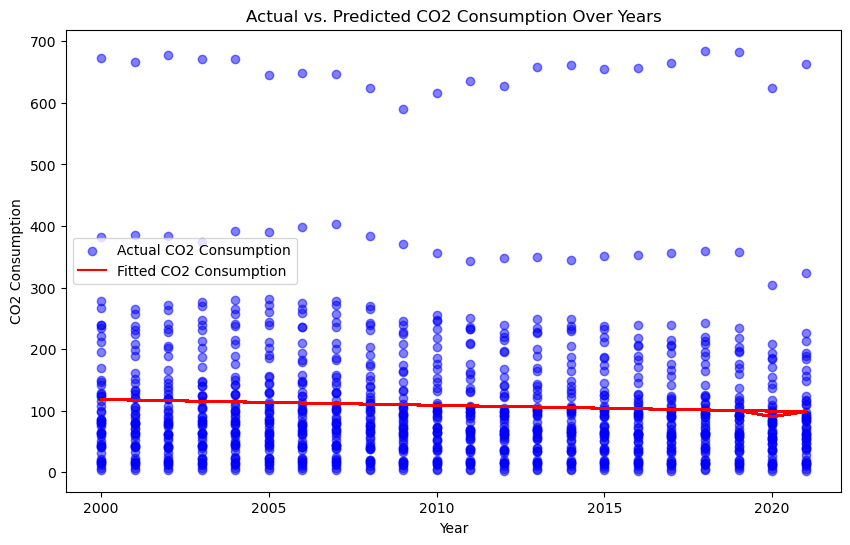

In [42]:
import matplotlib.pyplot as plt

# Add predicted values to the DataFrame
df['Predicted_CO2'] = results.fittedvalues

# Plotting actual vs. predicted CO2 consumption
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['CO2_Consumption'], color='blue', alpha=0.5, label='Actual CO2 Consumption')
plt.plot(df['Year'], df['Predicted_CO2'], color='red', label='Fitted CO2 Consumption')
plt.title('Actual vs. Predicted CO2 Consumption Over Years')
plt.xlabel('Year')
plt.ylabel('CO2 Consumption')
plt.legend()
plt.show()

Given the non-significant p-values for most coefficients, the very low explanatory power of the model (R-squared), and issues with autocorrelation and non-normal residuals, the current model is not robust or reliable for predicting or understanding changes in CO2 consumption over years and specifically in 2020. Consideration of additional variables, use of different modeling techniques (like time series analysis), or transformation of the data might be required to develop a more effective model.








So this model is bad


In [43]:
past_2000.iloc[5:,:]

,Year,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
36,2005,143.532081,47.490384,97.299157,60.236705,389.575519,95.75176,43.902022,17.403653,3.933054,...,13.295662,128.30816,645.021576,67.530138,6.816516,129.405965,79.164293,114.691543,110.963657,63.722509
37,2006,145.768722,45.422103,100.503816,62.097951,397.786377,96.625992,40.914923,16.237058,3.189142,...,13.388076,129.929299,648.38216,68.761339,6.678819,123.017662,77.011991,114.821993,103.149835,64.491024
38,2007,147.287643,43.653346,102.353396,63.377572,402.553429,99.33112,40.126656,17.115792,3.380858,...,13.860855,129.054697,646.192763,70.698198,6.511055,128.175121,82.130343,116.998976,104.797669,66.823717
39,2008,139.359998,39.079026,102.612853,64.170832,384.000454,97.387166,37.651975,16.180025,3.080702,...,14.938144,122.500746,623.648595,69.78782,5.927496,116.763209,79.20658,112.742249,105.274462,67.238401
40,2009,119.799631,37.286707,93.865336,61.543766,370.357761,93.326193,35.958415,11.921861,3.178749,...,14.693728,101.947285,590.457028,65.084132,6.189269,105.907699,76.899446,90.139125,96.410974,64.054567
41,2010,132.488087,37.137256,99.486545,66.087471,356.59218,95.887378,36.441049,13.079128,3.222492,...,15.078162,109.266709,615.543957,64.005428,5.877243,111.88656,73.350092,100.576496,99.025986,65.623891
42,2011,129.546321,37.085337,97.661505,67.484371,342.655381,92.505628,35.035056,13.865945,3.09067,...,14.611458,105.502677,635.041655,64.456874,5.812434,102.5194,68.89573,97.891108,98.201393,64.471422
43,2012,122.631497,36.155344,95.453857,66.255351,348.750203,91.20713,34.268171,14.585976,2.649876,...,14.89022,99.025397,627.109709,61.636804,5.453435,98.562584,67.878048,92.151706,90.864166,66.749146
44,2013,120.464376,34.049265,99.309315,68.512485,349.714192,92.138126,34.649656,14.035684,2.823538,...,15.361972,97.268743,657.830179,66.479075,5.729539,105.767402,73.830803,94.301351,101.293944,68.948689
45,2014,122.633476,33.919438,97.295433,68.914215,345.386127,92.77412,34.97991,13.776421,3.012849,...,15.38022,102.520573,661.990468,65.279546,5.890846,107.442618,72.469518,99.886649,101.21541,65.928877


In [44]:
df

,Year,CO2_Consumption,Year_2020,Predicted_CO2
0,2000.0,142.298577,0,118.085188
1,2001.0,133.321950,0,117.144785
2,2002.0,138.297153,0,116.204382
3,2003.0,139.792469,0,115.263979
4,2004.0,141.979013,0,114.323576
...,...,...,...,...
1117,2017.0,62.796996,0,102.098338
1118,2018.0,63.846521,0,101.157935
1119,2019.0,59.097402,0,100.217532
1120,2020.0,55.626761,1,90.092480


In [45]:
df

,Year,CO2_Consumption,Year_2020,Predicted_CO2
0,2000.0,142.298577,0,118.085188
1,2001.0,133.321950,0,117.144785
2,2002.0,138.297153,0,116.204382
3,2003.0,139.792469,0,115.263979
4,2004.0,141.979013,0,114.323576
...,...,...,...,...
1117,2017.0,62.796996,0,102.098338
1118,2018.0,63.846521,0,101.157935
1119,2019.0,59.097402,0,100.217532
1120,2020.0,55.626761,1,90.092480


In [46]:
# df_long = pd.melt(df, id_vars=['Year'], var_name='State', value_name='CO2_Consumption')
# df_long
df_long

,Year,State,CO2_Consumption,Year_2020
0,2000,Alabama,142.298577,0
1,2001,Alabama,133.32195,0
2,2002,Alabama,138.297153,0
3,2003,Alabama,139.792469,0
4,2004,Alabama,141.979013,0
...,...,...,...,...
1117,2017,Wyoming,62.796996,0
1118,2018,Wyoming,63.846521,0
1119,2019,Wyoming,59.097402,0
1120,2020,Wyoming,55.626761,1


In [47]:

# Correctly separate the data into two groups
data_2020 = df_long[df_long['Year'] == 2020]['CO2_Consumption'].values
data_other_years = df_long[df_long['Year'] != 2020]['CO2_Consumption'].values


Data types: <class 'float'> <class 'float'>


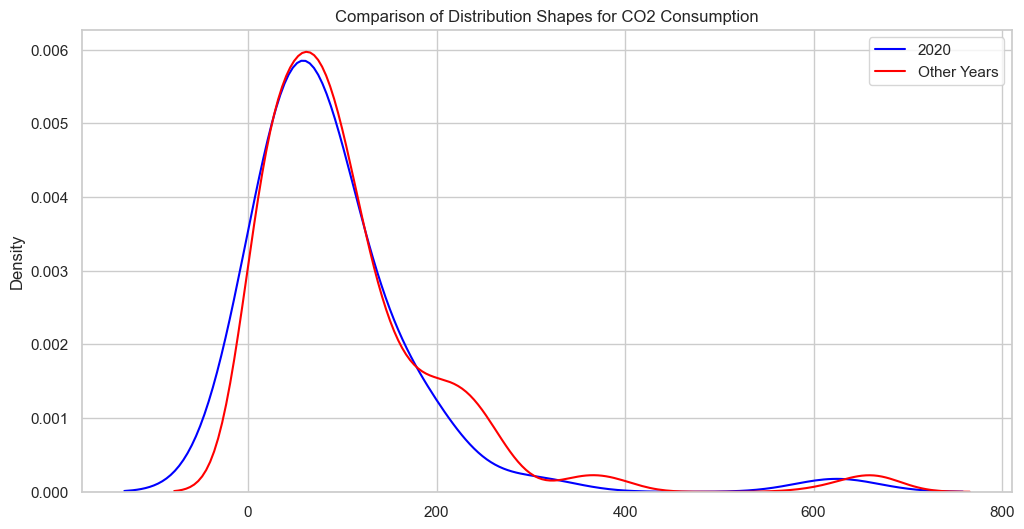

KS Statistic: 0.1568627450980392 P-Value: 0.16530670849969212


In [266]:
from scipy.stats import ks_2samp

print("Data types:", type(data_2020[0]), type(data_other_years[0]))

# Visual comparison of distributions
plt.figure(figsize=(12, 6))
sns.kdeplot(data_2020, color="blue", label="2020")
sns.kdeplot(data_other_years, color="red", label="Other Years")
plt.title('Comparison of Distribution Shapes for CO2 Consumption')
plt.legend()
plt.show()

# Kolmogorov-Smirnov test for comparing distribution shapes
ks_stat, ks_pvalue = ks_2samp(data_2020, data_other_years)
print("KS Statistic:", ks_stat, "P-Value:", ks_pvalue)

Interpretation
The p-value is above the typical alpha level of 0.05, which suggests that you do not have enough statistical evidence to reject the null hypothesis that the distributions of CO2 consumption for 2020 and other years are the same. This implies that the distributions may indeed have similar shapes, satisfying one of the crucial assumptions for the Mann-Whitney U test.

Next Steps
Since the p-value indicates that the distributions might not be significantly different in shape, you can reasonably proceed with the Mann-Whitney U test if the other assumptions (independence of samples and appropriate data type) are also met. This result supports the assumption that the shapes of the distributions are similar enough not to violate the conditions under which the Mann-Whitney U test provides valid results.



In [ ]:
u_statistic, p_value = mannwhitneyu(list(data_2020), list(data_other_years), alternative='less')
p_value

Decision Making: Based on this t-test, there is sufficient evidence to conclude that there was a decrease in CO2 consumption in 2020 compared to other years. Policy makers, researchers, or stakeholders looking at interventions based on changes in CO2 levels might decide to take actions based on the year alone.
